# Get Hapnest data onto Google Cloud

### Paths

In [16]:
hapnest_ftp_base = 'ftp://ftp.ebi.ac.uk//biostudies/fire/S-BSST/936/S-BSST936/Files/'
example_dir = 'example/'
genotypes_dir = 'genotypes/'
phenotypes_dir = 'phenotypes/'

### Example files

In [ ]:
hapnest_example_files = [
    'synthetic_small_v1_chr-10.bed',
    'synthetic_small_v1_chr-10.bim',
    'synthetic_small_v1_chr-10.fam',
    'synthetic_small_v1_chr-10.sample',
    'synthetic_small_v1_chr-11.bed',
    'synthetic_small_v1_chr-11.bim',
    'synthetic_small_v1_chr-11.fam',
    'synthetic_small_v1_chr-11.sample',
    'synthetic_small_v1_chr-12.bed',
    'synthetic_small_v1_chr-12.bim',
    'synthetic_small_v1_chr-12.fam',
    'synthetic_small_v1_chr-12.sample',
    'synthetic_small_v1_chr-13.bed',
    'synthetic_small_v1_chr-13.bim',
    'synthetic_small_v1_chr-13.fam',
    'synthetic_small_v1_chr-13.sample',
    'synthetic_small_v1_chr-14.bed',
    'synthetic_small_v1_chr-14.bim',
    'synthetic_small_v1_chr-14.fam',
    'synthetic_small_v1_chr-14.sample',
    'synthetic_small_v1_chr-15.bed',
    'synthetic_small_v1_chr-15.bim',
    'synthetic_small_v1_chr-15.fam',
    'synthetic_small_v1_chr-15.sample',
    'synthetic_small_v1_chr-16.bed',
    'synthetic_small_v1_chr-16.bim',
    'synthetic_small_v1_chr-16.fam',
    'synthetic_small_v1_chr-16.sample',
    'synthetic_small_v1_chr-17.bed',
    'synthetic_small_v1_chr-17.bim',
    'synthetic_small_v1_chr-17.fam',
    'synthetic_small_v1_chr-17.sample',
    'synthetic_small_v1_chr-18.bed',
    'synthetic_small_v1_chr-18.bim',
    'synthetic_small_v1_chr-18.fam',
    'synthetic_small_v1_chr-18.sample',
    'synthetic_small_v1_chr-19.bed',
    'synthetic_small_v1_chr-19.bim',
    'synthetic_small_v1_chr-19.fam',
    'synthetic_small_v1_chr-19.sample',
    'synthetic_small_v1_chr-1.bed',
    'synthetic_small_v1_chr-1.bim',
    'synthetic_small_v1_chr-1.fam',
    'synthetic_small_v1_chr-1.sample',
    'synthetic_small_v1_chr-20.bed',
    'synthetic_small_v1_chr-20.bim',
    'synthetic_small_v1_chr-20.fam',
    'synthetic_small_v1_chr-20.sample',
    'synthetic_small_v1_chr-21.bed',
    'synthetic_small_v1_chr-21.bim',
    'synthetic_small_v1_chr-21.fam',
    'synthetic_small_v1_chr-21.sample',
    'synthetic_small_v1_chr-22.bed',
    'synthetic_small_v1_chr-22.bim',
    'synthetic_small_v1_chr-22.fam',
    'synthetic_small_v1_chr-22.sample',
    'synthetic_small_v1_chr-2.bed',
    'synthetic_small_v1_chr-2.bim',
    'synthetic_small_v1_chr-2.fam',
    'synthetic_small_v1_chr-2.sample',
    'synthetic_small_v1_chr-3.bed',
    'synthetic_small_v1_chr-3.bim',
    'synthetic_small_v1_chr-3.fam',
    'synthetic_small_v1_chr-3.sample',
    'synthetic_small_v1_chr-4.bed',
    'synthetic_small_v1_chr-4.bim',
    'synthetic_small_v1_chr-4.fam',
    'synthetic_small_v1_chr-4.sample',
    'synthetic_small_v1_chr-5.bed',
    'synthetic_small_v1_chr-5.bim',
    'synthetic_small_v1_chr-5.fam',
    'synthetic_small_v1_chr-5.sample',
    'synthetic_small_v1_chr-6.bed',
    'synthetic_small_v1_chr-6.bim',
    'synthetic_small_v1_chr-6.fam',
    'synthetic_small_v1_chr-6.sample',
    'synthetic_small_v1_chr-7.bed',
    'synthetic_small_v1_chr-7.bim',
    'synthetic_small_v1_chr-7.fam',
    'synthetic_small_v1_chr-7.sample',
    'synthetic_small_v1_chr-8.bed',
    'synthetic_small_v1_chr-8.bim',
    'synthetic_small_v1_chr-8.fam',
    'synthetic_small_v1_chr-8.sample',
    'synthetic_small_v1_chr-9.bed',
    'synthetic_small_v1_chr-9.bim',
    'synthetic_small_v1_chr-9.fam',
    'synthetic_small_v1_chr-9.sample',
    'synthetic_small_v1.pheno1',
    'synthetic_small_v1.pheno2',
    'synthetic_small_v1.pheno3',
    'synthetic_small_v1.pheno4',
    'synthetic_small_v1.pheno5',
    'synthetic_small_v1.pheno6',
    'synthetic_small_v1.pheno7',
    'synthetic_small_v1.pheno8',
    'synthetic_small_v1.pheno9',
]

### Cloud connection

In [13]:
# Get a connection to GCS
import gcsfs

project = 'sgkit-on-coiled'
token_path = '/home/ec2-user/.config/gcloud/application_default_credentials.json'
gcs = gcsfs.GCSFileSystem(project=project, token=token_path)

### Move files from FTP -> local -> GCS

In [18]:
# Get file over FTP to local, upload to GCS, delete local
# Cell requires: hapnest_example_files, gcs
import os
import urllib.request

files = [
    'synthetic_v1.pheno1',
]

for f in files:
    print('Downloading', f)
    urllib.request.urlretrieve(hapnest_ftp_base+phenotypes_dir+f, f)
    gcs.put(f, 'hapnest/'+genotypes_dir+f)
    os.remove(f)

# Do some analysis on the Hapnest example data

### An overview of the data
- [HAPNEST BioStudies page](https://www.ebi.ac.uk/biostudies/studies/S-BSST936)
- [PLINK File format reference](https://www.cog-genomics.org/plink/1.9/formats)

- `.bed` files are binary files that contain genotype data.
- [`.bim`](https://www.cog-genomics.org/plink/1.9/formats#bim) files are no header TSVs with information about the SNPs in the data.
- [`.fam`](https://www.cog-genomics.org/plink/1.9/formats#fam) files are no header TSVs with information about the individuals in the data.
- `.sample` has the ancestry group of each individual.
- `.phenoX` files are TSVs with headers Sample, GenoEff, CovarEff, EnvEff, Phenotype(liability), Phenotype(binary). Liability is defined in the supplementary materials to be the sum of the covariate effects and the genetic effects. The binary phenotype is defined as 1 if the liability is greater than 0 and 0 otherwise (I think).

In [19]:
# PyData
import numpy as np
import pandas as pd
import xarray as xr
import dask.dataframe as dd
import dask.array as da
xr.set_options(display_expand_attrs=False, display_expand_data_vars=True);

# sgkit
import sgkit as sg
from sgkit.io import plink

In [6]:
file_base = 'synthetic_v1_chr-20'
dir = 'genotypes/'

# Files to get from GCS
files = [
    file_base + '.bed',
    file_base + '.bim',
    file_base + '.fam',
]

# Local directory to put them in
data_dir = ''
local_dir = data_dir + file_base

local_plink_path = local_dir+'/'+file_base # read_plink adds .bed, .bim, .fam
remote_zarr_path = 'gs://hapnest/'+dir+file_base+'.zarr'

In [7]:
# Move PLINK files from GCS to the local fs 
for f in files:
    print('Downloading', f)
    gcs.get('hapnest/'+dir+f, local_dir+'/'+f)

In [8]:
# Configure Dask
from dask.distributed import Client
client = Client(n_workers=16, threads_per_worker=1) # is this optimal?

# Read local PLINK files and write them as Zarr file to GCS
ds = plink.read_plink(path=local_plink_path)
ds.to_zarr(gcs.get_mapper(remote_zarr_path), mode='w') # do I need get_mapper?

/home/ec2-user/.local/lib/python3.9/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 9.65 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [9]:
ds = sg.load_dataset(remote_zarr_path)
ds

<xarray.Dataset>
Dimensions:             (variants: 153988, samples: 1008000, ploidy: 2,
                         contigs: 1, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, alleles
Data variables: (12/14)
    call_genotype       (variants, samples, ploidy) int8 dask.array<chunksize=(8192, 8192, 2), meta=np.ndarray>
    call_genotype_mask  (variants, samples, ploidy) bool dask.array<chunksize=(8192, 8192, 2), meta=np.ndarray>
    contig_id           (contigs) <U2 dask.array<chunksize=(1,), meta=np.ndarray>
    sample_family_id    (samples) <U10 dask.array<chunksize=(1008000,), meta=np.ndarray>
    sample_id           (samples) <U10 dask.array<chunksize=(1008000,), meta=np.ndarray>
    sample_maternal_id  (samples) <U1 dask.array<chunksize=(1008000,), meta=np.ndarray>
    ...                  ...
    sample_phenotype    (samples) int8 dask.array<chunksize=(1008000,), meta=np.ndarray>
    sample_sex          (samples) int8 dask.array<chunksize=(1008000,), meta=np.ndarray>
    variant_allele      (variants, alleles) |S1 dask.array<chunksize=(153988, 1), meta=np.ndarray>
    variant_contig      (variants) int16 dask.array<chunksize=(76994,), meta=np.ndarray>
    variant_id          (variants) <U18 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_position    (variants) int32 dask.array<chunksize=(153988,), meta=np.ndarray>
Attributes: (2)

In [10]:
ds["variant_contig_name"] = ds.contig_id[ds.variant_contig]
ds2 = ds.set_index({"variants": ("variant_contig_name", "variant_position", "variant_id")})
sg.display_genotypes(ds2, max_variants=10, max_samples=5)

samples,syn1,syn2,...,syn1007999,syn1008000
variants,,,,,
"(20, 60291, chr20:60291:G:T)",1/1,1/1,...,1/1,1/0
"(20, 60331, chr20:60331:T:C)",1/1,1/1,...,1/1,1/1
"(20, 60513, chr20:60513:A:C)",1/1,1/1,...,1/1,1/1
"(20, 60580, chr20:60580:G:A)",1/1,1/1,...,1/1,1/1
"(20, 60823, chr20:60823:T:C)",1/1,1/1,...,1/1,1/1
...,...,...,...,...,...
"(20, 64328176, chr20:64328176:A:C)",1/1,1/1,...,1/1,1/1
"(20, 64328876, chr20:64328876:T:C)",1/1,1/1,...,1/1,1/1
"(20, 64330371, chr20:64330371:C:T)",1/1,1/1,...,1/0,1/1


In [11]:
df_variant = ds[[v for v in ds.data_vars if v.startswith("variant_")]].to_dataframe()
df_variant.groupby(["variant_contig_name", "variant_position", "variant_id"]).agg({"variant_allele": lambda x: list(x)}).head(5)

variant_allele
variant_contig_name variant_position variant_id                    
20                  60291            chr20:60291:G:T   [b'T', b'G']
                    60331            chr20:60331:T:C   [b'C', b'T']
                    60513            chr20:60513:A:C   [b'C', b'A']
                    60580            chr20:60580:G:A   [b'A', b'G']
                    60823            chr20:60823:T:C   [b'C', b'T']

In [12]:
ds.sample_id[:5].values

array(['syn1', 'syn2', 'syn3', 'syn4', 'syn5'], dtype='<U10')

In [20]:
ancestry_file = 'gs://hapnest/genotypes/synthetic_v1.sample'
ancestry_df = pd.read_csv(ancestry_file, header=None)

In [21]:
# Make dask array from df and add to ds as a new data variable called "sample_ancestry" with the "samples" dimension
# Is there a better dtype to use than "object"?
ancestry_da = da.from_array(ancestry_df[0].values, chunks=(600,))

In [22]:
ds = ds.assign(sample_ancestry=('samples', ancestry_da))

In [23]:
# TODO: all phenotypes
# TODO: recode binary phenotypes as bool?
# TODO: use sample index to merge instead of just grabbing the array?
pheno_base = 'synthetic_v1'
pheno_file = 'gs://hapnest/genotypes/'+pheno_base+'.pheno1'
pheno_df = pd.read_csv(pheno_file, sep='\t', index_col='Sample')
pheno_da = da.from_array(pheno_df['Phenotype(binary)'].values, chunks=(600,))
ds = ds.assign(sample_pheno=('samples', pheno_da))
ds

<xarray.Dataset>
Dimensions:              (variants: 153988, samples: 1008000, ploidy: 2,
                          contigs: 1, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, alleles
Data variables: (12/17)
    call_genotype        (variants, samples, ploidy) int8 dask.array<chunksize=(8192, 8192, 2), meta=np.ndarray>
    call_genotype_mask   (variants, samples, ploidy) bool dask.array<chunksize=(8192, 8192, 2), meta=np.ndarray>
    contig_id            (contigs) <U2 dask.array<chunksize=(1,), meta=np.ndarray>
    sample_family_id     (samples) <U10 dask.array<chunksize=(1008000,), meta=np.ndarray>
    sample_id            (samples) <U10 dask.array<chunksize=(1008000,), meta=np.ndarray>
    sample_maternal_id   (samples) <U1 dask.array<chunksize=(1008000,), meta=np.ndarray>
    ...                   ...
    variant_contig       (variants) int16 dask.array<chunksize=(76994,), meta=np.ndarray>
    variant_id           (variants) <U18 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_position     (variants) int32 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_contig_name  (variants) <U2 dask.array<chunksize=(76994,), meta=np.ndarray>
    sample_ancestry      (samples) object dask.array<chunksize=(600,), meta=np.ndarray>
    sample_pheno         (samples) int64 dask.array<chunksize=(600,), meta=np.ndarray>
Attributes: (2)

In [24]:
ds.sample_ancestry.to_series().value_counts()

sample_ancestry
AFR    168000
AMR    168000
EAS    168000
EUR    168000
CSA    168000
MID    168000
Name: count, dtype: int64

In [25]:
ds.sample_pheno.to_series().describe()

count    1.008000e+06
mean     4.999663e-01
std      5.000002e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: sample_pheno, dtype: float64

In [26]:
len(ds.samples)

1008000

In [27]:
df_variant.groupby(["variant_contig_name", "variant_position", "variant_id"])["variant_allele"].apply(tuple).value_counts()

variant_allele
(b'A', b'G')    30884
(b'T', b'C')    30722
(b'G', b'A')    21498
(b'C', b'T')    21055
(b'A', b'C')     7177
(b'T', b'G')     6997
(b'C', b'G')     6750
(b'G', b'C')     6335
(b'G', b'T')     5799
(b'A', b'T')     5673
(b'C', b'A')     5601
(b'T', b'A')     5497
Name: count, dtype: int64

In [28]:
ds = sg.sample_stats(ds)
ds

<xarray.Dataset>
Dimensions:              (samples: 1008000, variants: 153988, ploidy: 2,
                          contigs: 1, alleles: 2)
Dimensions without coordinates: samples, variants, ploidy, contigs, alleles
Data variables: (12/23)
    sample_n_called      (samples) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    sample_call_rate     (samples) float64 dask.array<chunksize=(8192,), meta=np.ndarray>
    sample_n_het         (samples) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    sample_n_hom_ref     (samples) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    sample_n_hom_alt     (samples) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    sample_n_non_ref     (samples) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    ...                   ...
    variant_contig       (variants) int16 dask.array<chunksize=(76994,), meta=np.ndarray>
    variant_id           (variants) <U18 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_position     (variants) int32 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_contig_name  (variants) <U2 dask.array<chunksize=(76994,), meta=np.ndarray>
    sample_ancestry      (samples) object dask.array<chunksize=(600,), meta=np.ndarray>
    sample_pheno         (samples) int64 dask.array<chunksize=(600,), meta=np.ndarray>
Attributes: (2)

2024-01-11 17:09:53,642 - distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:42645 -> tcp://127.0.0.1:34479
Traceback (most recent call last):
  File "/home/ec2-user/.local/lib/python3.9/site-packages/tornado/iostream.py", line 861, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/home/ec2-user/.local/lib/python3.9/site-packages/tornado/iostream.py", line 1116, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
TimeoutError: [Errno 110] Connection timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/ec2-user/.local/lib/python3.9/site-packages/distributed/worker.py", line 1780, in get_data
    response = await comm.read(deserializers=serializers)
  File "/home/ec2-user/.local/lib/python3.9/site-packages/distributed/comm/tcp.py", line 237, in read
    convert_stream_closed_error(self, e)
  File "/home/ec2-user/.local/lib/python3.9/site-packages/distributed/co

KeyboardInterrupt: 

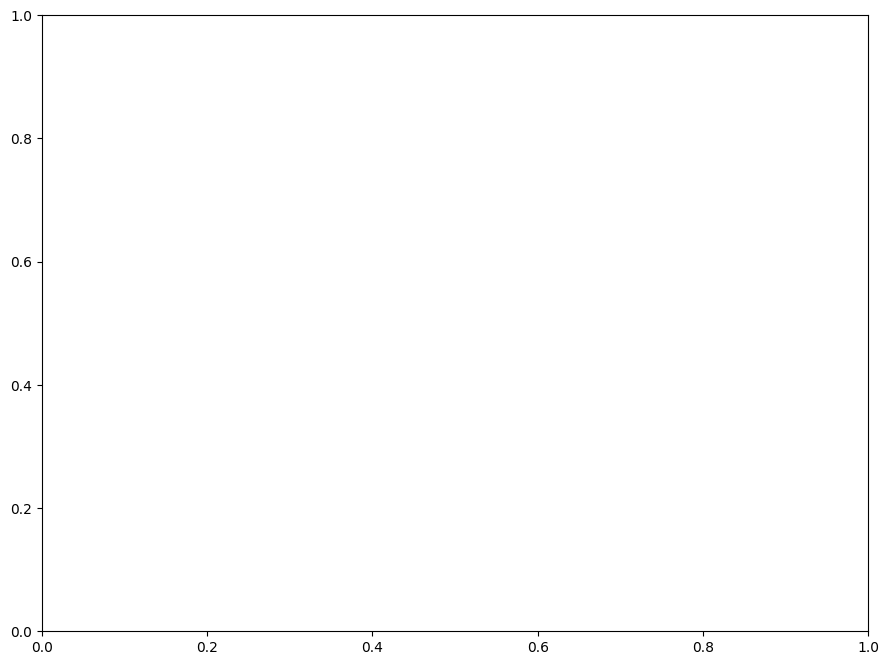

In [30]:
ds.sample_call_rate.attrs["long_name"] = "Sample call rate"
xr.plot.hist(ds.sample_call_rate, range=(.88,1), bins=50, size=8, edgecolor="black");

In [31]:
ds = sg.variant_stats(ds)
ds

<xarray.Dataset>
Dimensions:                   (variants: 153988, alleles: 2, samples: 1008000,
                               ploidy: 2, contigs: 1)
Dimensions without coordinates: variants, alleles, samples, ploidy, contigs
Data variables: (12/32)
    variant_n_called          (variants) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    variant_call_rate         (variants) float64 dask.array<chunksize=(8192,), meta=np.ndarray>
    variant_n_het             (variants) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    variant_n_hom_ref         (variants) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    variant_n_hom_alt         (variants) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    variant_n_non_ref         (variants) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    ...                        ...
    variant_contig            (variants) int16 dask.array<chunksize=(76994,), meta=np.ndarray>
    variant_id                (variants) <U18 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_position          (variants) int32 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_contig_name       (variants) <U2 dask.array<chunksize=(76994,), meta=np.ndarray>
    sample_ancestry           (samples) object dask.array<chunksize=(600,), meta=np.ndarray>
    sample_pheno              (samples) int64 dask.array<chunksize=(600,), meta=np.ndarray>
Attributes: (2)

In [32]:
ds = sg.hardy_weinberg_test(ds)
ds

2024-01-11 17:15:36,228 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:36,231 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:36,266 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:33091
Traceback (most recent call last):
  File "/home/ec2-user/.local/lib/python3.9/site-packages/tornado/iostream.py", line 861, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/home/ec2-user/.local/lib/python3.9/site-packages/tornado/iostream.py", line 1116, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
ConnectionResetError: [Errno 104] Connection reset by peer

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/ec2-user/.local/lib/python3.9/site-packages/distributed/worker.py", line 2056, in gather_dep
    response = await get_data_from_worker(
  File "/home/ec2-user/.local/lib/python3.9/site-packages/distributed/worker.py"

KilledWorker: Attempted to run task ('arange-genotype_as_bytes-index_as_genotype-astype-0d9ea21cc0c15c028899cea1fa9b05c4', 0) on 4 different workers, but all those workers died while running it. The last worker that attempt to run the task was tcp://127.0.0.1:39295. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

2024-01-11 17:15:37,570 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:37,571 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:37,588 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:37,626 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:37,628 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:37,658 - distributed.nanny - WARNING - Restarting worker
2024-01-11 17:15:37,686 - distributed.nanny - WARNING - Restarting worker


In [ ]:
ds = ds.sel(variants=((ds.variant_allele_frequency[:,1] > 0.01) & (ds.variant_hwe_p_value > 1e-6)).compute())

In [33]:
print(f"Samples: {len(ds.samples)}  Variants: {len(ds.variants)}")

Samples: 1008000  Variants: 153988


In [34]:
ds["call_dosage"] = ds.call_genotype.sum(dim="ploidy")
ds_lr = sg.gwas_linear_regression(ds,
                                  dosage="call_dosage",
                                  add_intercept=True,
                                  covariates=[],
                                  traits=["sample_pheno"])
ds_lr

/home/ec2-user/.local/lib/python3.9/site-packages/dask/array/routines.py:443: PerformanceWarning: Increasing number of chunks by factor of 19
  out = blockwise(
/home/ec2-user/.local/lib/python3.9/site-packages/dask/array/routines.py:443: PerformanceWarning: Increasing number of chunks by factor of 14
  out = blockwise(
/home/ec2-user/.local/lib/python3.9/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 14
  result = blockwise(


<xarray.Dataset>
Dimensions:                   (variants: 153988, traits: 1, alleles: 2,
                               samples: 1008000, ploidy: 2, contigs: 1)
Dimensions without coordinates: variants, traits, alleles, samples, ploidy,
                                contigs
Data variables: (12/36)
    variant_linreg_beta       (variants, traits) float64 dask.array<chunksize=(8192, 1), meta=np.ndarray>
    variant_linreg_t_value    (variants, traits) float64 dask.array<chunksize=(8192, 1), meta=np.ndarray>
    variant_linreg_p_value    (variants, traits) float64 dask.array<chunksize=(8192, 1), meta=np.ndarray>
    variant_n_called          (variants) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    variant_call_rate         (variants) float64 dask.array<chunksize=(8192,), meta=np.ndarray>
    variant_n_het             (variants) int64 dask.array<chunksize=(8192,), meta=np.ndarray>
    ...                        ...
    variant_id                (variants) <U18 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_position          (variants) int32 dask.array<chunksize=(153988,), meta=np.ndarray>
    variant_contig_name       (variants) <U2 dask.array<chunksize=(76994,), meta=np.ndarray>
    sample_ancestry           (samples) object dask.array<chunksize=(600,), meta=np.ndarray>
    sample_pheno              (samples) int64 dask.array<chunksize=(600,), meta=np.ndarray>
    call_dosage               (variants, samples) int64 dask.array<chunksize=(8192, 8192), meta=np.ndarray>
Attributes: (2)

In [36]:
import seaborn as sns
%matplotlib inline

In [38]:
def manhattan_plot(ds):
    df = ds[["variant_contig_name", "variant_contig", "variant_position", "variant_linreg_p_value"]].to_dataframe()
    df["variant_linreg_log_p_value"] = -np.log10(df["variant_linreg_p_value"])
    df = df.astype({"variant_position": np.int64}) # to avoid overflow in cumulative_pos
    
    # from https://github.com/mojones/video_notebooks/blob/master/Manhattan%20plots%20in%20Python.ipynb, cell 20
    running_pos = 0
    cumulative_pos = []
    for chrom, group_df in df.groupby("variant_contig"):  
        cumulative_pos.append(group_df["variant_position"] + running_pos)
        running_pos += group_df["variant_position"].max()
    df["cumulative_pos"] = pd.concat(cumulative_pos)
    
    df["color group"] = df["variant_contig"].apply(lambda x : "A" if x % 2 == 0 else "B")
    
    g = sns.relplot(
        data = df,
        x = "cumulative_pos",
        y = "variant_linreg_log_p_value",
        hue = "color group",
        palette = ["blue", "orange"],
        linewidth=0,
        s=10,
        legend=None,
        aspect=3
    )
    g.ax.set_xlabel("Chromosome")
    g.ax.set_xticks(df.groupby("variant_contig")["cumulative_pos"].median())
    g.ax.set_xticklabels(df["variant_contig_name"].unique())

In [39]:
manhattan_plot(ds_lr)

/home/ec2-user/.local/lib/python3.9/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 22.80 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
import math
import matplotlib.pyplot as plt

def qq_plot(ds):
    p = ds["variant_linreg_p_value"].squeeze().values
    p.sort()
    n = len(p)
    expected_p = -np.log10(np.arange(1, n + 1) / n)
    observed_p = -np.log10(p)
    max_val = math.ceil(max(np.max(expected_p), np.max(observed_p)))

    df = pd.DataFrame({"Expected -log10(p)": expected_p, "Observed -log10(p)": observed_p})

    fig, ax = plt.subplots(figsize=(12, 12));
    g = sns.scatterplot(data=df, x="Expected -log10(p)", y="Observed -log10(p)", ax=ax, linewidth=0)

    x_pred = np.linspace(0, max_val, 50)
    sns.lineplot(x=x_pred, y=x_pred, ax=ax)
    
    g.set(xlim=(0, max_val), ylim=(0, max_val))

In [ ]:
qq_plot(ds_lr)

In [ ]:
ds_pca = sg.stats.pca.count_call_alternate_alleles(ds)

In [ ]:
# To run PCA we need to filter out variants with any missing alt allele counts
# Or where the counts are zero for all samples
variant_mask = (((ds_pca.call_alternate_allele_count < 0).any(dim="samples")) | \
    (ds_pca.call_alternate_allele_count.std(dim="samples") <= 0.0)).compute()
ds_pca = ds_pca.sel(variants=~variant_mask)

In [ ]:
ds_pca = sg.pca(ds_pca)

In [ ]:
ds_pca.sample_pca_projection.values

In [ ]:
ds_pca

In [ ]:
ds_pca["sample_pca_projection_0"] = ds_pca.sample_pca_projection[:,0]
ds_pca["sample_pca_projection_1"] = ds_pca.sample_pca_projection[:,1]
ds_pca["sample_pca_projection_2"] = ds_pca.sample_pca_projection[:,2]
# scatterplot fails: unable to allocate 420. GiB
# TODO: fix scatterplot
#ds_pca.plot.scatter(x="sample_pca_projection_0", y="sample_pca_projection_1", hue="sample_ancestry", size=8, s=10);

In [ ]:
# copy pca components back to dataset with full set of variants to run linear regression again
ds["sample_pca_projection_0"] = ds_pca.sample_pca_projection[:,0]
ds["sample_pca_projection_1"] = ds_pca.sample_pca_projection[:,1]
ds["sample_pca_projection_2"] = ds_pca.sample_pca_projection[:,2]
ds_lr = sg.gwas_linear_regression(ds, dosage="call_dosage",
                                  add_intercept=True,
                                  covariates=["sample_pca_projection_0", "sample_pca_projection_1", "sample_pca_projection_2"],
                                  traits=["sample_pheno"])

In [ ]:
qq_plot(ds_lr)

In [ ]:
manhattan_plot(ds_lr)